In [52]:
library(lme4)
library(e1071) 
library(parameters) 
options(scipen = 100)


data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1005471000423792512,1,2021-06-03 16:54:39.051000+00:00,undergrad,centreLeft,False,62,1,0,0,⋯,0,0,1,Control,High,0.1,0.1,0.00,0.00,0.5000000
2,-1005471000423792512,1,2021-06-03 16:54:39.051000+00:00,undergrad,centreLeft,False,62,1,0,0,⋯,0,0,1,Control,Low,0.0,0.1,0.25,0.00,0.0000000
3,-1664633636092023808,1,2021-06-03 16:49:19.299000+00:00,undergrad,centreLeft,True,34,1,0,0,⋯,0,0,0,Treatment,High,0.5,0.0,0.00,0.00,1.0000000
4,-1664633636092023808,1,2021-06-03 16:49:19.299000+00:00,undergrad,centreLeft,True,34,1,0,0,⋯,0,0,0,Treatment,Low,0.2,0.5,0.75,0.00,0.2857143
5,-1819320343547555584,1,2021-06-03 14:25:15.128000+00:00,undergrad,centre,False,24,0,0,1,⋯,1,1,0,Control,Low,0.2,0.1,0.00,0.00,0.6666667
6,-1851184731657247488,1,2021-06-03 17:11:34.484000+00:00,undergrad,centreLeft,False,64,0,0,1,⋯,0,0,1,Treatment,High,0.0,0.0,0.00,0.25,NA


In [53]:
md.denies = lmer(Denies ~ evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000223109002751
evidenceLow,0.0000000002167521


Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -78.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6061 -0.5191 -0.0071  0.5490  3.7786 

Random effects:
 Groups   Name        Variance  Std.Dev.
 user_id  (Intercept) 0.0004021 0.02005 
 Residual             0.0338515 0.18399 
Number of obs: 165, groups:  user_id, 89

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.09093    0.02082   4.367
evidenceLow  0.20676    0.02869   7.208

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.718

In [54]:
md.denies = lmer(Denies ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Parameter,p
<chr>,<dbl>
(Intercept),0.00394028337
evidenceLow,0.00000385553
conditionTreatment,0.53557538893
evidenceLow:conditionTreatment,0.30976033739


Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -74.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8856 -0.5771 -0.2504  0.2946  3.5650 

Random effects:
 Groups   Name        Variance                  Std.Dev.       
 user_id  (Intercept) 0.00000000000000000006924 0.0000000002631
 Residual             0.03365864566407396341052 0.1834629272198
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.08000    0.02735   2.925
evidenceLow                     0.18122    0.03788   4.784
conditionTreatment              0.02588    0.04169   0.621
evidenceLow:conditionTreatment  0.05884    0.05775   1.019

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.722              
cndtnTrtmnt -0.656  0.474       
evdncLw:cnT  0.474 -0.656 -0.722
optimizer (nloptwrap) co

Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


## linearity and constant variance 

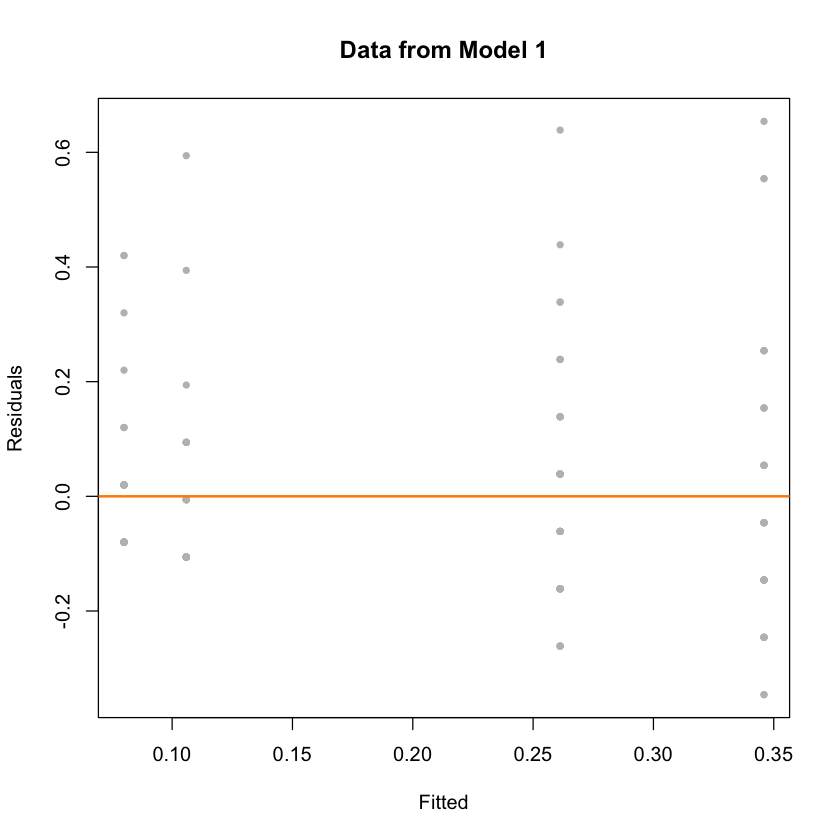

In [55]:
plot(fitted(md.denies), resid(md.denies), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

## Normality

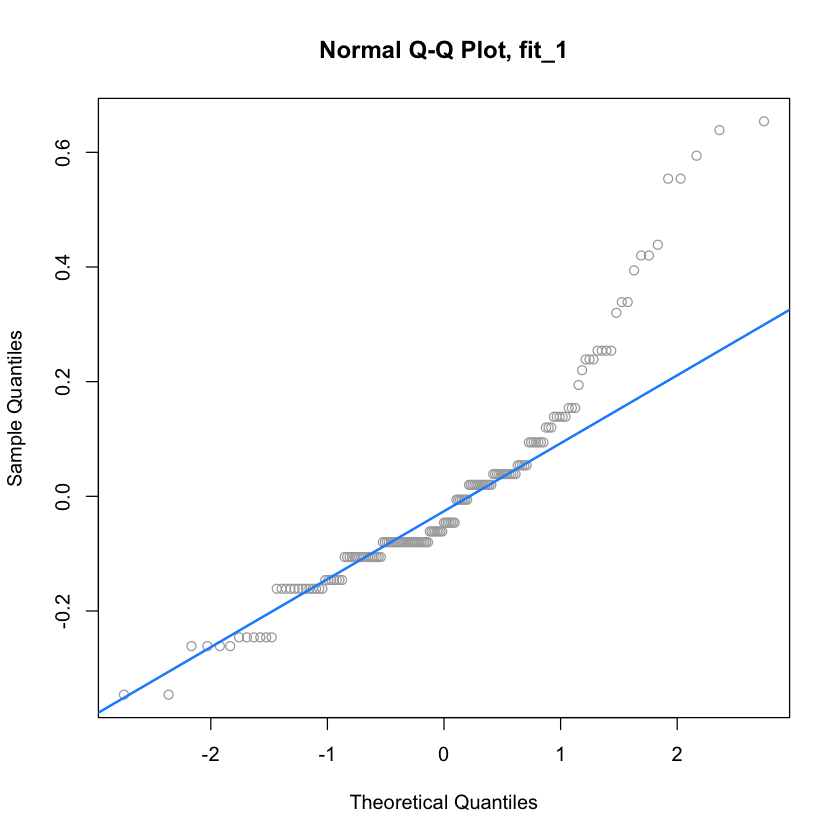

In [56]:
qqnorm(resid(md.denies), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.denies), col = "dodgerblue", lwd = 2)

In [57]:
shapiro.test(resid(md.denies))


	Shapiro-Wilk normality test

data:  resid(md.denies)
W = 0.89489, p-value = 0.000000001915


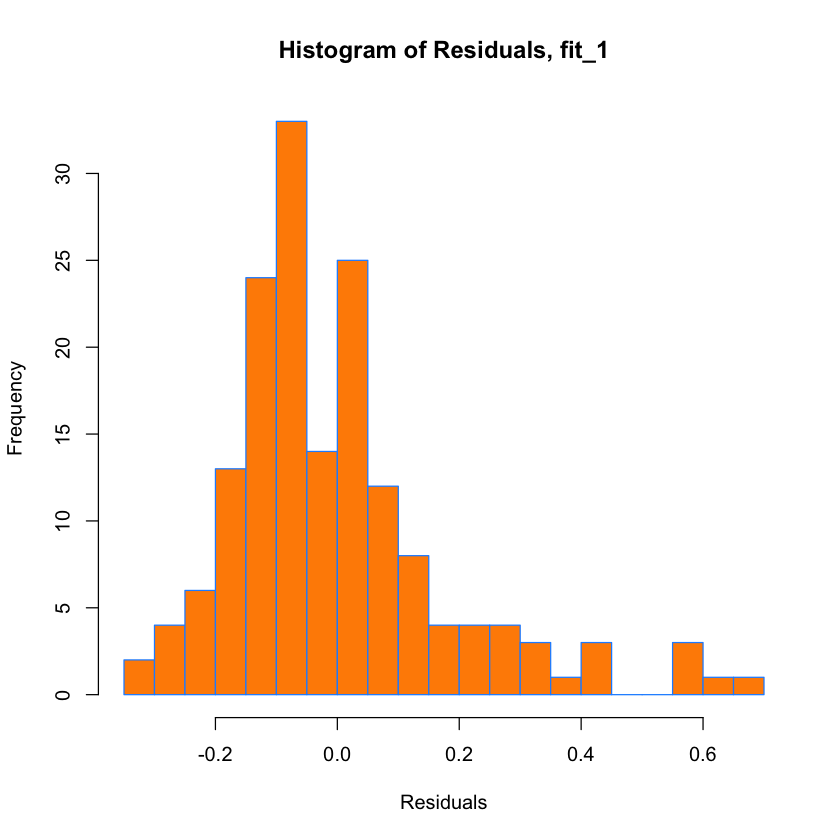

In [58]:
hist(resid(md.denies),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

In [59]:
skewness(data$Denies)$Skewness
skewness(sqrt(data$Denies))$Skewness

[1] 1.389044

[1] 0.07015206

In [60]:
md.denies = lmer(sqrt(Denies) ~ evidence + (1 |user_id), 
                 data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Parameter,p
<chr>,<dbl>
(Intercept),0.000000000000959122925
evidenceLow,0.000000000000003879549


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -15

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2242 -0.8714  0.2111  0.5879  2.8487 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.00000  0.0000  
 Residual             0.05058  0.2249  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.19598    0.02530   7.745
evidenceLow  0.30426    0.03505   8.681

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.722
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


In [61]:
md.denies = lmer(sqrt(Denies) ~ evidence*condition + (1 |user_id), 
                 data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Parameter,p
<chr>,<dbl>
(Intercept),0.000000294836739
evidenceLow,0.000000003999743
conditionTreatment,0.434850323667477
evidenceLow:conditionTreatment,0.595176510145150


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -9.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.42876 -0.79785  0.01501  0.61306  2.75717 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.00000  0.0000  
 Residual             0.05023  0.2241  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.17882    0.03341   5.352
evidenceLow                     0.28811    0.04628   6.226
conditionTreatment              0.03987    0.05093   0.783
evidenceLow:conditionTreatment  0.03756    0.07055   0.532

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.722              
cndtnTrtmnt -0.656  0.474       
evdncLw:cnT  0.474 -0.656 -0.722
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSi

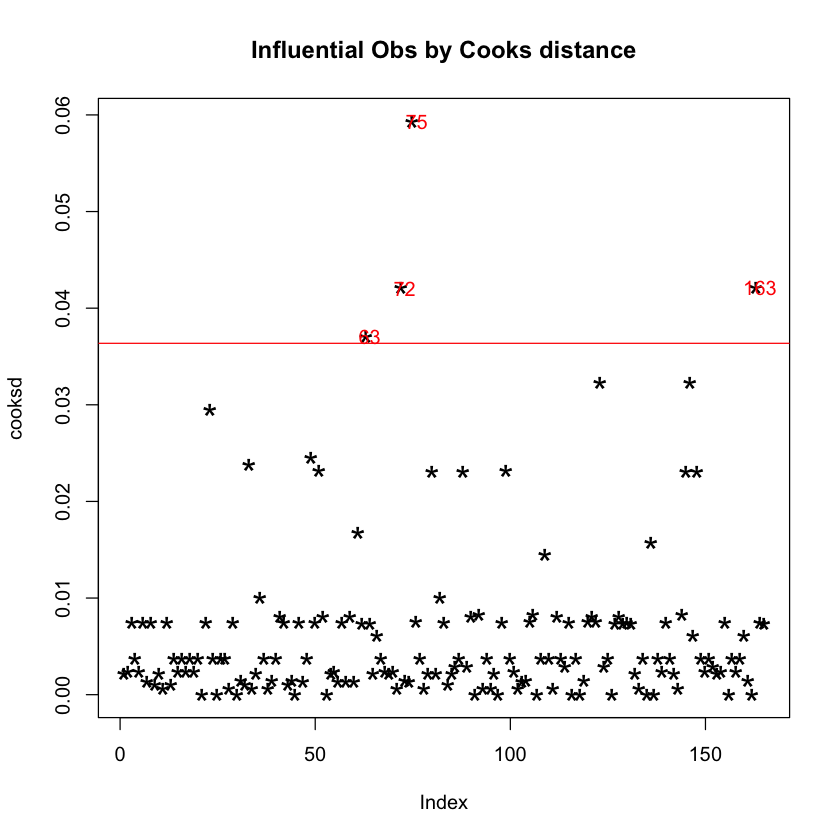

In [82]:
mod <- lm(sqrt(Denies) ~ evidence*condition + (1 |user_id),data=data)
cooksd <- cooks.distance(mod)
thresh <- 6
# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = thresh/sample_size, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>thresh/sample_size, names(cooksd),""), col="red")  # add label

In [83]:
md.denies = lmer(sqrt(Denies) ~ evidence*condition + (1 |user_id), 
                 data = data,
                 subset = cooksd<=(thresh/sample_size)
                )
p_value_satterthwaite(md.denies)
summary(md.denies)

boundary (singular) fit: see ?isSingular



Parameter,p
<chr>,<dbl>
(Intercept),0.0000000424934180
evidenceLow,0.0000000003459833
conditionTreatment,0.9125115344663081
evidenceLow:conditionTreatment,0.1232671259587511


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence * condition + (1 | user_id)
   Data: data
 Subset: cooksd <= (thresh/sample_size)

REML criterion at convergence: -32.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.24318 -0.85908 -0.09471  0.66011  2.53794 

Random effects:
 Groups   Name        Variance                    Std.Dev.        
 user_id  (Intercept) 0.0000000000000000000005342 0.00000000002311
 Residual             0.0433284172600355912963188 0.20815479158558
Number of obs: 161, groups:  user_id, 87

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                    0.178822   0.031030   5.763
evidenceLow                    0.288106   0.042978   6.704
conditionTreatment             0.005297   0.048134   0.110
evidenceLow:conditionTreatment 0.103240   0.066626   1.550

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.722              
cndtnTrtmnt -0.645  0.465

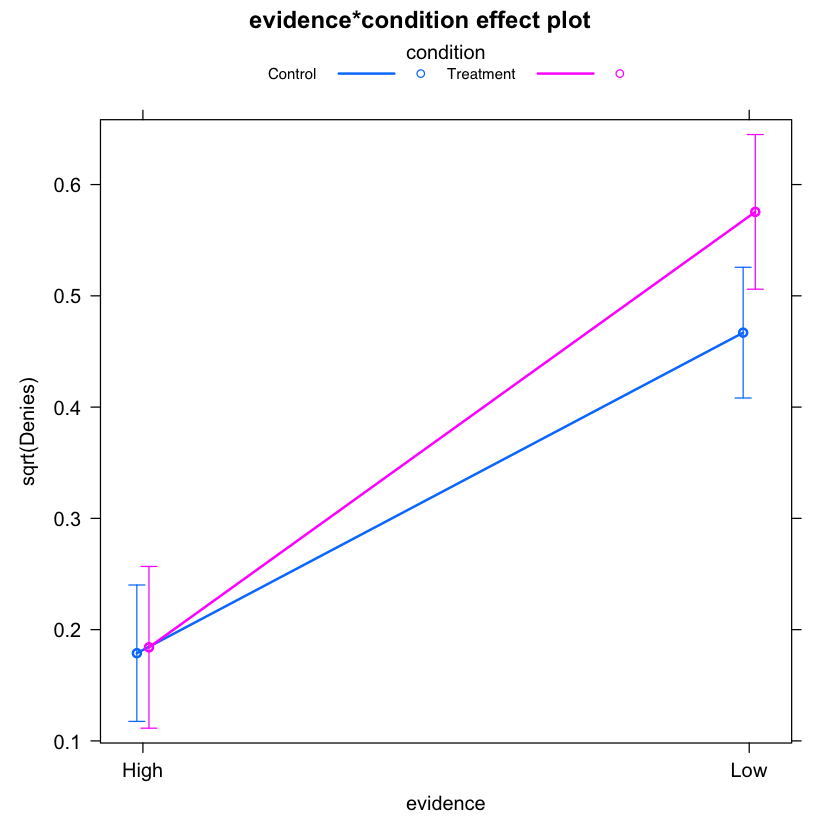

In [84]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")